In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('clean_dataset_with_stemming.csv')
df.head()

,Teks,label
0,dek baik,0
1,ikut seminar inspiratif cara mudah sukses bisn...,1
2,pilih menang cek rupiah juta kuota flash inter...,1
3,punya masalah uang cukup jamin bpkb mobil pinj...,1
4,diskn tgel jkerbet bit lysngroy pasar baik gam...,1


## Data Description

#### TODO : Add data description (maybe words frequencies in each class)

#### Data preview

In [3]:
print('SMS\t:', df.shape[0], 'data\n')
print('consist of :')
print('- Spam SMS\t:', df[df.label == 1].shape[0], 'data')
print('- Non-Spam SMS\t:', df[df.label == 0].shape[0], 'data')

SMS	: 7247 data

consist of :
- Spam SMS	: 4156 data
- Non-Spam SMS	: 3091 data


In [4]:
pd.set_option('display.max_colwidth', -1)

print('sample of Spam SMS')
df[df.label == 1].sample(10)

sample of Spam SMS


,Teks,label
6065,premium pizza diskon waktu batas sd september online klik goo glfhyi hubung gratis biaya sk laku,1
444,nomor baru papa kirimin pulsa nomor baru papa papa kantor polisi masalah telepon papa,1
3486,nikmat alam interaksi asisten virtual telkomsel akun line telkomsel tsel melineva,1
5388,beli gratis pizza pasta tukar sms pizzaexpress pizza marzano dekat laku hari tc apply promo,1
2181,main togel online mudah aman www afatogel com diskon togel besar minimal deposit live dingdong pasar togel resmi,1
441,bapak pinjam hp orang bliin bapak ribu kirim nomr brunya bapak bapak msalh kantor polisi tlpsms nnti bapak telepon penting,1
2512,special diskon nasi bebek dower madura ekores teh manis ribu bebek dower citraland tukar hari dine in only slma stok promo,1
217,isi saldo tcashmu jaring atm atm bca laku transfer bank pilih bank tcash kode bank guna nomor hp nomor rekening tuju,1
6570,belanja hemat tokopedia gratis ongkir pakai ninja xpress download aplikasi bit lypromotokped habis promonya,1
3810,dapat perdana kuota internet gb rupiah booth telkomsel terminal poris plawad isi saldo tcashmu dptkan promo skb,1


In [5]:
print('sample of Non-Spam SMS')
df[df.label == 0].sample(10)

sample of Non-Spam SMS


,Teks,label
2854,snow verification kode,0
4942,tes,0
2714,milik google verification kode,0
770,perlu kampus nama kirimin kunci pakai jne cenah ip,0
2657,use as milik login kode vsco account kit by facebook,0
1112,pas ngomong langsung diem nuy kikuk diomongin,0
1815,langgan tribe aktif sd download tribe httponelink toswthw menang samsung galaxy informasi irenetribenow televisi,0
6646,tagih kredivo rupiah jatuh tempo bayar hindar denda bayar lewat aplikasiapp kredivo com,0
4874,asalamualaikum kaka bibi pakai sepeda kaka coba nomor porsih haji bibi perobahan lihat ka,0
1976,halo kak interviewnya tetap jam,0


#### Highest word frequencies in each class

In [6]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
words_count_matrix = cv.fit_transform(df['Teks'])
df_count_vect = pd.SparseDataFrame(words_count_matrix, columns=cv.get_feature_names())

In [7]:
# non-spam
df_non_spam_words = df_count_vect[df.label == 0]
non_spam_words_count = df_non_spam_words.sum()
indices = np.argsort(non_spam_words_count)[::-1][:10]
non_spam_words_count = non_spam_words_count[indices]

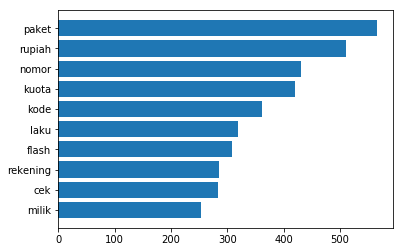

In [8]:
plt.barh(np.arange(len(non_spam_words_count)), non_spam_words_count.values, align='edge', height=0.8)
plt.yticks(np.arange(len(non_spam_words_count)) + 0.4, non_spam_words_count.keys())
plt.gca().invert_yaxis()
plt.show()

In [9]:
# spam
df_spam_words = df_count_vect[df.label == 1]
spam_words_count = df_spam_words.sum()
indices = np.argsort(spam_words_count)[::-1][:10]
spam_words_count = spam_words_count[indices]

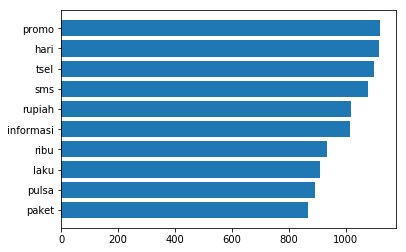

In [10]:
plt.barh(np.arange(len(spam_words_count)), spam_words_count.values, align='edge', height=0.8)
plt.yticks(np.arange(len(spam_words_count)) + 0.4, spam_words_count.keys())
plt.gca().invert_yaxis()
plt.show()

## Feature Extraction

#### TODO: Add more feature extraction

In [11]:
from utils import fair_train_test_split

X = df['Teks']
y = df['label']

X_train, X_test, y_train, y_test = fair_train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5796,), (1451,), (5796,), (1451,))

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(5796, 8428)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_train_tfidf.shape

(5796, 8428)

## Model Evaluation

#### TODO: Add more Classifier Model and hyperparameter tuning

In [14]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_cv, y_train)
print('Multinomial Naive Bayes with count vectorizer\t:', clf.score(cv.transform(X_test), y_test))

clf = MultinomialNB().fit(X_train_tfidf, y_train)
print('Multinomial Naive Bayes with tfidf\t\t:', clf.score(tfidf.transform(X_test), y_test))

Multinomial Naive Bayes with count vectorizer	: 0.9193659545141282
Multinomial Naive Bayes with tfidf		: 0.9035148173673329


In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train_cv, y_train)
print('Logistic Regression with count vectorizer\t:', clf.score(cv.transform(X_test), y_test))

clf = LogisticRegression().fit(X_train_tfidf, y_train)
print('Logistic Regression with tfidf\t\t\t:', clf.score(tfidf.transform(X_test), y_test))

Logistic Regression with count vectorizer	: 0.9338387319090282
Logistic Regression with tfidf			: 0.9276361130254996


In [16]:
from sklearn.svm import SVC

clf = SVC(kernel='linear').fit(X_train_cv, y_train)
print('SVM Linear Kernel with count vectorizer\t\t:', clf.score(cv.transform(X_test), y_test))

clf = SVC(kernel='linear').fit(X_train_tfidf, y_train)
print('SVM Linear Kernel with tfidf\t\t\t:', clf.score(tfidf.transform(X_test), y_test))

SVM Linear Kernel with count vectorizer		: 0.9317711922811854
SVM Linear Kernel with tfidf			: 0.9345279117849759


In [17]:
from sklearn.svm import SVC

clf = SVC(gamma=0.05).fit(X_train_cv, y_train)
print('SVM RBF Kernel with count vectorizer\t\t:', clf.score(cv.transform(X_test), y_test))

clf = SVC(gamma=0.05).fit(X_train_tfidf, y_train)
print('SVM RBF Kernel with tfidf\t\t\t:', clf.score(tfidf.transform(X_test), y_test))

SVM RBF Kernel with count vectorizer		: 0.9407305306685044
SVM RBF Kernel with tfidf			: 0.9276361130254996


In [18]:
from sklearn.svm import SVC

clf = SVC(gamma=0.05, kernel='sigmoid').fit(X_train_cv, y_train)
print('SVM RBF Kernel with count vectorizer\t\t:', clf.score(cv.transform(X_test), y_test))

clf = SVC(gamma=0.05).fit(X_train_tfidf, y_train)
print('SVM RBF Kernel with tfidf\t\t\t:', clf.score(tfidf.transform(X_test), y_test))

SVM RBF Kernel with count vectorizer		: 0.90144727773949
SVM RBF Kernel with tfidf			: 0.9276361130254996


In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=400).fit(X_train_cv, y_train)
print('Random Forest with count vectorizer\t\t:', clf.score(cv.transform(X_test), y_test))

clf = RandomForestClassifier(n_estimators=400).fit(X_train_tfidf, y_train)
print('Random Forest with tfidf\t\t\t:', clf.score(tfidf.transform(X_test), y_test))

Random Forest with count vectorizer		: 0.9427980702963473
Random Forest with tfidf			: 0.9448656099241902


In [20]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=450).fit(X_train_cv, y_train)
print('Ada Boost with count vectorizer\t\t\t:', clf.score(cv.transform(X_test), y_test))

clf = AdaBoostClassifier(n_estimators=450).fit(X_train_tfidf, y_train)
print('Ada Boost with tfidf\t\t\t\t:', clf.score(tfidf.transform(X_test), y_test))

Ada Boost with count vectorizer			: 0.9407305306685044
Ada Boost with tfidf				: 0.926946933149552


In [21]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=1500).fit(X_train_cv, y_train)
print('Gradient Boosting with count vectorizer\t\t:', clf.score(cv.transform(X_test), y_test))

clf = GradientBoostingClassifier(n_estimators=1500).fit(X_train_tfidf, y_train)
print('Gradient Boosting with tfidf\t\t\t:', clf.score(tfidf.transform(X_test), y_test))

Gradient Boosting with count vectorizer		: 0.9338387319090282
Gradient Boosting with tfidf			: 0.9345279117849759
